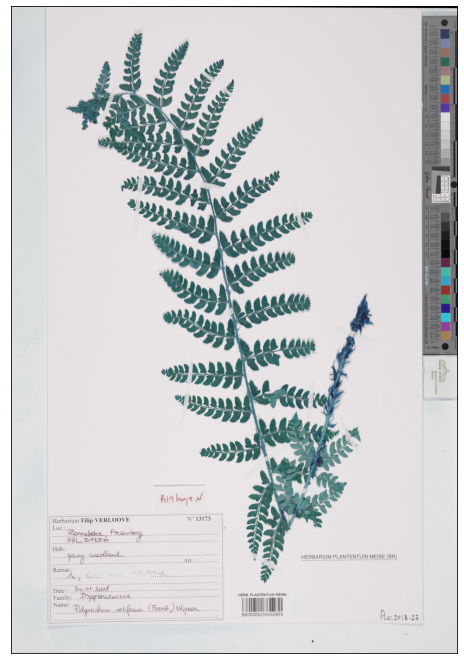

In [28]:
import cv2
from skimage.exposure import histogram
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.filters import rank
from skimage.morphology import disk, remove_small_objects
from skimage.util import img_as_ubyte
import numpy as np


file_path = "data/full_images/http___oxalis.br.fgov.be_images_V_BR0_000_025_416_589_BR0000025416589V.jpg"
# be_images_V_BR0_000_026_211_169_BR0000026211169V
# be_images_V_BR0_000_025_412_536_BR0000025412536V.jpg
# be_images_V_BR0_000_025_952_377_BR0000025952377V.jpg
# be_images_V_BR0_000_025_416_589_BR0000025416589V
# be_images_V_BR0_000_025_416_114_BR0000025416114V
# be_images_V_BR0_000_025_343_045_BR0000025343045V

def plot_mat(mat):
    plt.figure(figsize=(8,12))
    plt.imshow(mat)
    plt.xticks([]), plt.yticks([])
    plt.show()

image = cv2.imread(file_path)

plot_mat(image)

Resized Dimensions :  (4082, 2817, 3)


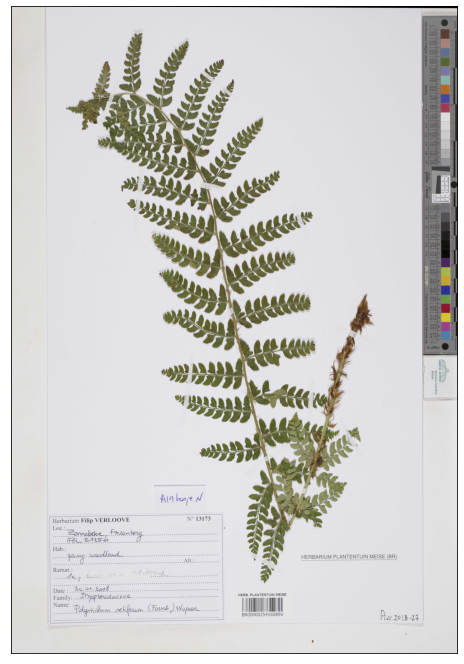

True

In [32]:
scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

print('Resized Dimensions : ', resized.shape)
plot_mat(resized)

cv2.imwrite('data/cropped/1.jpg', resized)

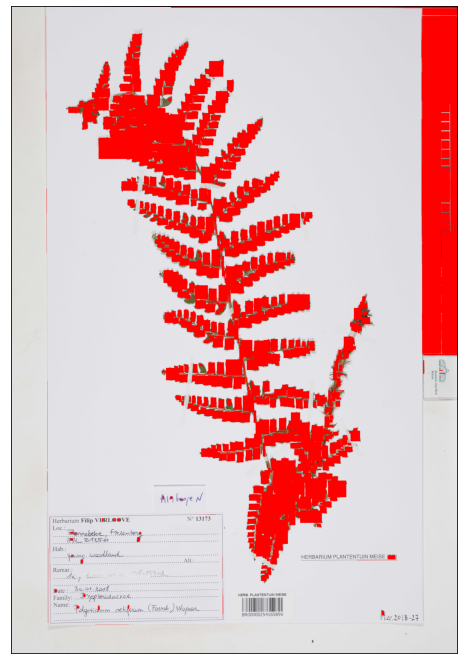

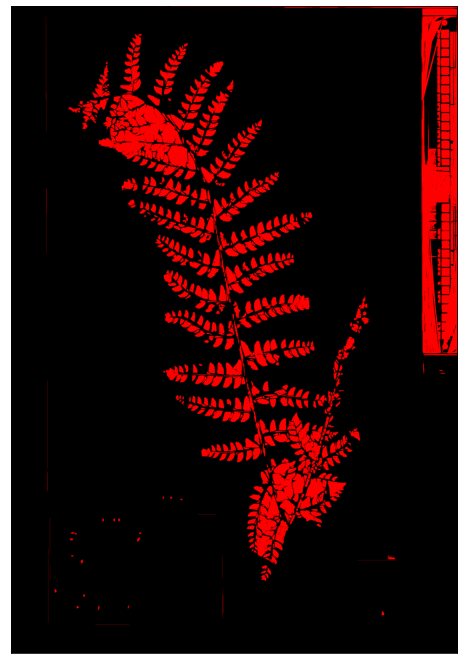

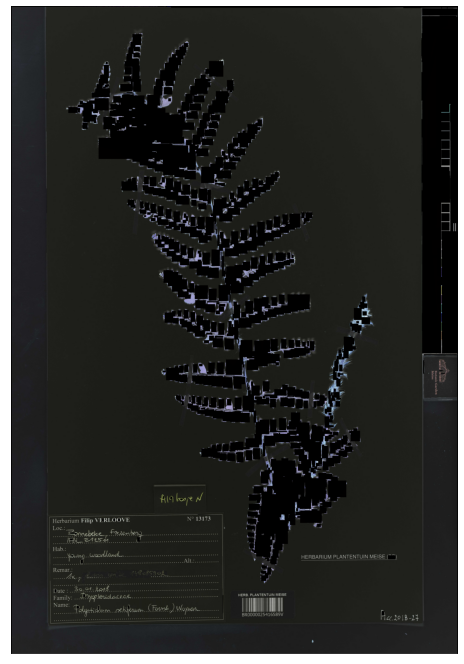

In [25]:
vis = resized.copy()

mser = cv2.MSER_create()

regions, _ = mser.detectRegions(vis)

mask = np.zeros((vis.shape[0], vis.shape[1], 1), dtype=np.uint8)

for i, p in enumerate(regions):
    xmax, ymax = np.amax(p, axis=0)
    xmin, ymin = np.amin(p, axis=0)
    cv2.rectangle(vis, (xmin, ymax), (xmax, ymin), (255, 0, 0), thickness=cv2.FILLED)
    cv2.drawContours(mask, [p], 0, (255), -1)

plot_mat(vis)

# apply the mask to the original image
result = cv2.bitwise_and(vis, vis, mask=mask)

plot_mat(result)

#this is used to find only text regions, remaining are ignored
masked = cv2.bitwise_and(vis, vis, mask=mask)

text_region = result - vis

plot_mat(text_region)

'gray_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)\n\n#plot_mat(gray_image)\n# perform threshold\nretr , thresh = cv2.threshold(gray_image, 190, 255, cv2.THRESH_BINARY_INV)\n\n#plot_mat(thresh)\n# find contours\nret, contours, hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)\n# create emtpy mask\nmask = np.zeros(image.shape[:2], dtype=image.dtype)\n#mask = np.zeros((vis.shape[0], vis.shape[1], 1), dtype=np.uint8)\n# draw all contours larger than 20 on the mask\nfor c in contours:\n    #if cv2.contourArea(c) > 20:\n    #x, y, w, h = cv2.boundingRect(c)\n    cv2.drawContours(mask, [c], 0, (255), -1)\n\n# apply the mask to the original image\nresult = cv2.bitwise_and(vis, vis, mask=mask)\nplot_mat(result)'

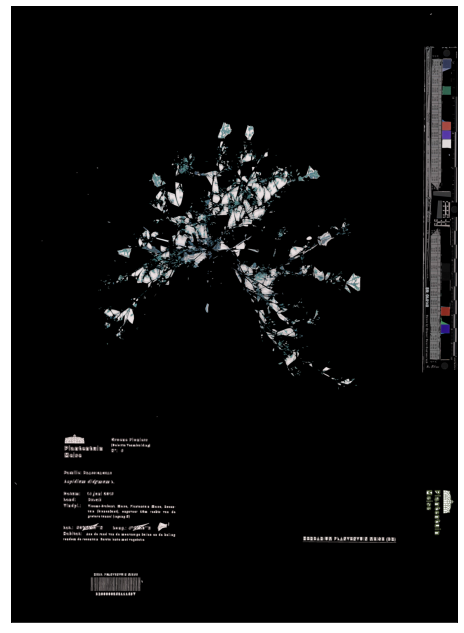

In [ ]:
# find rectangles
# apply canny edge detection
#edges = cv2.Canny(thresh, 100, 200)
#plot_mat(edges)

In [ ]:
#img_bin = 255-residual
#plot_mat(img_bin)

In [ ]:
#gray = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
#segments = segmentation.slic(thresh, compactness=5, n_segments=15, start_label=1, convert2lab=True)

In [ ]:
#plot_mat(segmentation.mark_boundaries(resized, segments, color=(255,0,0)))

In [ ]:
'''

thresh1 = cv2.threshold(thresh, 1, 255, cv2.THRESH_BINARY)[1]
plot_mat(thresh1)
#morph = cv2.GaussianBlur(morph, (3, 3), 0)

#canny = cv2.Canny(morph, 120, 255, 1)

#kernel = np.ones((5,5),np.uint8)
#dilate = cv2.dilate(canny, kernel, iterations=1)

# Find contours
#cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

area_thresh = 0
for c in cntrs:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    aspect = w / h
    if area > area_thresh and aspect > 1:
        big_contour = c
        area_thresh = area

x,y,w,h = cv2.boundingRect(big_contour)
#text = original[y:y+h, x:x+w]
# extract region from thresholded image
#binary_text = thresh[y:y+h, x:x+w]  
# Iterate thorugh contours and filter for ROI
image_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    ROI = original[y:y+h, x:x+w]
    #cv2.imwrite("ROI_{}.png".format(image_number), ROI)
    image_number += 1'''

In [ ]:
#residual_thresh = cv2.threshold(residual, 220, 255, cv2.THRESH_BINARY)[1]
#plot_mat(residual_thresh)

#orig = residual_thresh.copy()

#blurred = cv2.GaussianBlur(residual_thresh, (3, 3), 0)
#canny = cv2.Canny(residual_thresh, 255, 0, 0)
#kernel = np.ones((5,5),np.uint8)
#dilate = cv2.dilate(canny, kernel, iterations=1)

# Find contours
#cntrs = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

#for c in cntrs:
#    x,y,w,h = cv2.boundingRect(c)
#    cv2.rectangle(residual_thresh, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
#plot_mat(residual_thresh)

In [ ]:
#plot_mat(canny)